In [ ]:
# Set the input and output file paths
input_file = "kitti_labels.txt"
output_file = "eye_iris_labels.txt"

# Define the classes that we want to extract
classes = ["eye", "iris"]

# Open the input and output files
with open(input_file, "r") as f_in, open(output_file, "w") as f_out:
    # Loop over each line in the input file
    for line in f_in:
        # Split the line into its components
        components = line.strip().split(" ")
        
        # Extract the class and bounding box coordinates
        class_label = components[0]
        xmin = components[4]
        ymin = components[5]
        xmax = components[6]
        ymax = components[7]
        
        # Check if the class is one of the classes we want to extract
        if class_label in classes:
            # Write the class and bounding box coordinates to the output file
            output_line = f"{xmin} {ymin} {xmax} {ymax}\n"
            f_out.write(output_line)


In [ ]:
# Set the input and output file paths
input_file = ("D:/Academics/PHD Admission/IIT Kanpur/IITK SEM2/Project IITK1/Datasets/IRIS_Detection_Data/Results/Hardik_Face_Output_labels/merged.txt")
output_file = "D:/Academics/PHD Admission/IIT Kanpur/IITK SEM2/Project IITK1/Datasets/IRIS_Detection_Data/Results/Hardik_Face_Output_labels/coordinates_merged.txt"

# Define the classes that we want to extract
classes = ["eye", "iris"]

# Open the input and output files
with open(input_file, "r") as f_in, open(output_file, "w") as f_out:
    # Write the header line
    f_out.write("class, xmin, ymin, xmax, ymax\n")
    
    # Loop over each class
    for class_label in classes:
        # Loop over each line in the input file
        for line in f_in:
            # Split the line into its components
            components = line.strip().split(" ")
            
            # Extract the object class and bounding box coordinates
            object_class = components[0]
            xmin = components[4]
            ymin = components[5]
            xmax = components[6]
            ymax = components[7]
            
            # Check if the object class is the current class
            if object_class == class_label:
                # Write the bounding box coordinates to the output file
                output_line = f"{class_label}, {xmin}, {ymin}, {xmax}, {ymax}\n"
                f_out.write(output_line)
        
        # Reset the file pointer to the beginning of the input file
        f_in.seek(0)


In [ ]:
import csv

# Open the input .txt file and read its contents
with open("D:/Academics/PHD Admission/IIT Kanpur/IITK SEM2/Project IITK1/Datasets/IRIS_Detection_Data/Results/Hardik_Face_Output_labels/coordinates_merged.txt", 'r') as f:
    content = f.readlines()

# Initialize lists to hold the center coordinates of the left and right eyes and irises
right_eye_centers = []
left_eye_centers = []
right_iris_centers = []
left_iris_centers = []

# Loop through each line in the file
for line in content:
    # Split the line by whitespace to extract the class name and bounding box coordinates
    line = line.strip().split()
    class_name = line[0]
    xmin, ymin, xmax, ymax = map(int, line[:])

    # Calculate the center coordinates of the bounding box
    center_x = (xmin + xmax) // 2
    center_y = (ymin + ymax) // 2

    # Determine which eye or iris this bounding box belongs to, and add its center coordinates to the appropriate list
    if class_name == 'eye':
        if len(right_eye_centers) == len(left_eye_centers):
            right_eye_centers.append((center_x, center_y))
        else:
            left_eye_centers.append((center_x, center_y))
    elif class_name == 'iris':
        if len(right_iris_centers) == len(left_iris_centers):
            right_iris_centers.append((center_x, center_y))
        else:
            left_iris_centers.append((center_x, center_y))

# Write the center coordinates to a CSV file
with open('D:/Academics/PHD Admission/IIT Kanpur/IITK SEM2/Project IITK1/Datasets/IRIS_Detection_Data/Results/Hardik_Face_Output_labels/coordinates_merged.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['right_eye_x', 'right_eye_y', 'left_eye_x', 'left_eye_y', 'right_iris_x', 'right_iris_y', 'left_iris_x', 'left_iris_y'])
    for i in range(len(right_eye_centers)):
        row = [right_eye_centers[i][0], right_eye_centers[i][1], left_eye_centers[i][0], left_eye_centers[i][1], right_iris_centers[i][0], right_iris_centers[i][1], left_iris_centers[i][0], left_iris_centers[i][1]]


In [ ]:
!pip install pupil-detectors

In [13]:
import cv2
from pupil_detectors import Detector2D

detector = Detector2D()

# read image as numpy array from somewhere, e.g. here from a file
img = cv2.imread("E:/Driver_Gaze_Data/P4320230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-39-06.829160-1-recordings/2023-05-28_18-01-05-82c6b903/exports/000/Eye0_Rotate_Frame/36248.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

result = detector.detect(gray)
ellipse = result["ellipse"]
print(ellipse)
# draw the ellipse outline onto the input image
# note that cv2.ellipse() cannot deal with float values
# also it expects the axes to be semi-axes (half the size)
cv2.ellipse(
   img,
   tuple(int(v) for v in ellipse["center"]),
   tuple(int(v / 2) for v in ellipse["axes"]),
   ellipse["angle"],
   0, 360, # start/end angle for drawing
   (0, 0, 255) # color (BGR): red
)
cv2.imshow("Image", img)
cv2.waitKey(0)

{'center': (0.0, 0.0), 'axes': (0.0, 0.0), 'angle': -90.0}


-1

In [49]:
import cv2
from pupil_detectors import Detector2D

detector = Detector2D()

# Read image as a numpy array from somewhere, e.g., from a file
img = cv2.imread("E:/Driver_Gaze_Data/P4320230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-39-06.829160-1-recordings/2023-05-28_18-01-05-82c6b903/exports/000/Eye1_Rotate_Frame/36422.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresholded = cv2.threshold(gray, 200, 200, cv2.THRESH_BINARY)

# Detect ellipse on the thresholded image
result = detector.detect(thresholded)
ellipse = result["ellipse"]
print(ellipse)

# Draw the ellipse outline onto the input image
cv2.ellipse(
    img,
    tuple(int(v) for v in ellipse["center"]),
    tuple(int(v / 2) for v in ellipse["axes"]),
    ellipse["angle"],
    0, 360,  # start/end angle for drawing
    (0, 0, 255)  # color (BGR): red
)

# Display the image
cv2.imshow("Image", img)
cv2.waitKey(0)


{'center': (0.0, 0.0), 'axes': (0.0, 0.0), 'angle': -90.0}


-1

In [ ]:
import os
import cv2
import csv
from pupil_detectors import Detector2D

# Initialize the detector
detector = Detector2D()

# Folder containing the images
folder_path = "C:/Users/Pavan Kumar Sharma/Downloads/pupil-cloud-download-2024-01-05T06-07-56.675903-1-recordings/2023-05-11_16-46-45-273bb776/Left_Eye_Rotate_Frames/"

# Output CSV file path
output_csv_path = "C:/Users/Pavan Kumar Sharma/Downloads/pupil-cloud-download-2024-01-05T06-07-56.675903-1-recordings/2023-05-11_16-46-45-273bb776/output_results.csv"

# Open the CSV file for writing
with open(output_csv_path, 'w', newline='') as csvfile:
    fieldnames = ['filename', 'center_x', 'center_y', 'major_axis', 'minor_axis', 'angle']
    csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header to the CSV file
    csv_writer.writeheader()

    # Iterate through all image files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            # Read the image
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect ellipse
            result = detector.detect(gray)
            ellipse = result["ellipse"]

            # Draw the ellipse
            cv2.ellipse(
                img,
                tuple(int(v) for v in ellipse["center"]),
                tuple(int(v / 2) for v in ellipse["axes"]),
                ellipse["angle"],
                0, 360,
                (0, 0, 255)
            )

            # Show the image with the ellipse
            cv2.imshow("Image", img)
            cv2.waitKey(0)

            # Write the results to the CSV file
            csv_writer.writerow({
                'filename': filename,
                'center_x': ellipse['center'][0],
                'center_y': ellipse['center'][1],
                'major_axis': ellipse['axes'][0],
                'minor_axis': ellipse['axes'][1],
                'angle': ellipse['angle']
            })

# Close the CSV file
csvfile.close()


In [ ]:
import os
import cv2
import csv
from pupil_detectors import Detector2D

# Initialize the detector
detector = Detector2D()

# Folder containing the images
folder_path = "C:/Users/Pavan Kumar Sharma/Downloads/pupil-cloud-download-2024-01-05T06-07-56.675903-1-recordings/2023-05-11_16-46-45-273bb776/Left_Eye_Rotate_Frames/"

# Output CSV file path
output_csv_path = "C:/Users/Pavan Kumar Sharma/Downloads/pupil-cloud-download-2024-01-05T06-07-56.675903-1-recordings/2023-05-11_16-46-45-273bb776/output_results.csv"

# Open the CSV file for writing in append mode
with open(output_csv_path, 'a', newline='') as csvfile:
    fieldnames = ['filename', 'center_x', 'center_y', 'major_axis', 'minor_axis', 'angle']
    csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # If the file is empty, write the header
    if csvfile.tell() == 0:
        csv_writer.writeheader()

    # Iterate through all image files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            # Read the image
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect ellipse
            result = detector.detect(gray)
            ellipse = result["ellipse"]

            # Draw the ellipse
            cv2.ellipse(
                img,
                tuple(int(v) for v in ellipse["center"]),
                tuple(int(v / 2) for v in ellipse["axes"]),
                ellipse["angle"],
                0, 360,
                (0, 0, 255)
            )

            # Show the image with the ellipse
            cv2.imshow("Image", img)
            cv2.waitKey(0)

            # Write the results to the CSV file
            csv_writer.writerow({
                'filename': filename,
                'center_x': ellipse['center'][0],
                'center_y': ellipse['center'][1],
                'major_axis': ellipse['axes'][0],
                'minor_axis': ellipse['axes'][1],
                'angle': ellipse['angle']
            })

# Close the CSV file
csvfile.close()


# Pupil Detected 

In [11]:
# Use this for pupil detection

import os
import cv2
import csv
from pupil_detectors import Detector2D

# Initialize the detector
detector = Detector2D()

# Folder containing the input images
input_folder_path = "/Volumes/DOOMSDAY69/Driving_Data/Drivers/D2020230704CD/left/"

# Output folder path for images with ellipse drawn
output_folder_path = "/Volumes/DOOMSDAY69/Driving_Data/Drivers/D2020230704CD/left_detected/"

# Output CSV file path
output_csv_path = "/Volumes/DOOMSDAY69/Driving_Data/Drivers/D2020230704CD/left_output_results1.csv"

# Open the CSV file for writing
with open(output_csv_path, 'w', newline='') as csvfile:
    fieldnames = ['filename', 'center_x', 'center_y', 'major_axis', 'minor_axis', 'angle']
    csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header to the CSV file
    csv_writer.writeheader()

    # Iterate through all image files in the input folder
    for filename in os.listdir(input_folder_path):
        if filename.endswith(".jpg"):
            # Read the image
            img_path = os.path.join(input_folder_path, filename)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect ellipse
            result = detector.detect(gray)
            ellipse = result["ellipse"]

            # Draw the ellipse on the image
            cv2.ellipse(
                img,
                tuple(int(v) for v in ellipse["center"]),
                tuple(int(v / 2) for v in ellipse["axes"]),
                ellipse["angle"],
                0, 360,
                (0, 0, 255)
            )

            # Save the image with ellipse drawn to the output folder
            output_img_path = os.path.join(output_folder_path, filename)
            cv2.imwrite(output_img_path, img)

            # Write the results to the CSV file
            csv_writer.writerow({
                'filename': filename,
                'center_x': ellipse['center'][0],
                'center_y': ellipse['center'][1],
                'major_axis': ellipse['axes'][0],
                'minor_axis': ellipse['axes'][1],
                'angle': ellipse['angle']
            })

# Close the CSV file
csvfile.close()


In [12]:
# Use this for pupil detection 2

import os
import cv2
import csv
from pupil_detectors import Detector2D

# Initialize the detector
detector = Detector2D()

# Folder containing the input images
input_folder_path = "/Volumes/DOOMSDAY69/Driving_Data/Drivers/D2020230704CD/right/"

# Output folder path for images with ellipse drawn
output_folder_path = "/Volumes/DOOMSDAY69/Driving_Data/Drivers/D2020230704CD/right_detected/"

# Output CSV file path
output_csv_path = "/Volumes/DOOMSDAY69/Driving_Data/Drivers/D2020230704CD/right_output_results1.csv"

# Open the CSV file for writing
with open(output_csv_path, 'w', newline='') as csvfile:
    fieldnames = ['filename', 'center_x', 'center_y', 'major_axis', 'minor_axis', 'angle']
    csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header to the CSV file
    csv_writer.writeheader()

    # Iterate through all image files in the input folder
    for filename in os.listdir(input_folder_path):
        if filename.endswith(".jpg"):
            # Read the image
            img_path = os.path.join(input_folder_path, filename)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect ellipse
            result = detector.detect(gray)
            ellipse = result["ellipse"]

            # Draw the ellipse on the image
            cv2.ellipse(
                img,
                tuple(int(v) for v in ellipse["center"]),
                tuple(int(v / 2) for v in ellipse["axes"]),
                ellipse["angle"],
                0, 360,
                (0, 0, 255)
            )

            # Save the image with ellipse drawn to the output folder
            output_img_path = os.path.join(output_folder_path, filename)
            cv2.imwrite(output_img_path, img)

            # Write the results to the CSV file
            csv_writer.writerow({
                'filename': filename,
                'center_x': ellipse['center'][0],
                'center_y': ellipse['center'][1],
                'major_axis': ellipse['axes'][0],
                'minor_axis': ellipse['axes'][1],
                'angle': ellipse['angle']
            })

# Close the CSV file
csvfile.close()


In [ ]:













!pip install pye3d

In [ ]:
import os
import cv2
import csv
from pupil_detectors import Detector2D


In [ ]:
import argparse

import cv2
from pupil_detectors import Detector2D

from pye3d.detector_3d import CameraModel, Detector3D, DetectorMode


def main(eye_video_path):
    # create 2D detector
    detector_2d = Detector2D()
    # create pye3D detector
    camera = CameraModel(focal_length=561.5, resolution=[400, 400])
    detector_3d = Detector3D(camera=camera, long_term_mode=DetectorMode.blocking)
    # load eye video
    eye_video = cv2.VideoCapture(eye_video_path)
    # read each frame of video and run pupil detectors
    while eye_video.isOpened():
        frame_number = eye_video.get(cv2.CAP_PROP_POS_FRAMES)
        fps = eye_video.get(cv2.CAP_PROP_FPS)
        ret, eye_frame = eye_video.read()
        if ret:
            # read video frame as numpy array
            grayscale_array = cv2.cvtColor(eye_frame, cv2.COLOR_BGR2GRAY)
            # run 2D detector on video frame
            result_2d = detector_2d.detect(grayscale_array)
            result_2d["timestamp"] = frame_number / fps
            # pass 2D detection result to 3D detector
            result_3d = detector_3d.update_and_detect(result_2d, grayscale_array)
            ellipse_3d = result_3d["ellipse"]
            # draw 3D detection result on eye frame
            cv2.ellipse(
                eye_frame,
                tuple(int(v) for v in ellipse_3d["center"]),
                tuple(int(v / 2) for v in ellipse_3d["axes"]),
                ellipse_3d["angle"],
                0,
                360,  # start/end angle for drawing
                (0, 255, 0),  # color (BGR): red
            )
            # show frame
            cv2.imshow("eye_frame", eye_frame)
            # press esc to exit
            if cv2.waitKey(1) & 0xFF == 27:
                break
        else:
            break
    eye_video.release()
    cv2.destroyAllWindows()


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument('E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/PI_left_v1_ps1.mp4')
    args = parser.parse_args()
    main(args.eye_video_path)

In [ ]:
import argparse

import cv2
from pupil_detectors import Detector2D

from pye3d.detector_3d import CameraModel, Detector3D, DetectorMode


def main(eye_video_path):
    # create 2D detector
    detector_2d = Detector2D()
    # create pye3D detector
    camera = CameraModel(focal_length=561.5, resolution=[400, 400])
    detector_3d = Detector3D(camera=camera, long_term_mode=DetectorMode.blocking)
    # load eye video
    eye_video = cv2.VideoCapture(eye_video_path)
    # read each frame of video and run pupil detectors
    while eye_video.isOpened():
        frame_number = eye_video.get(cv2.CAP_PROP_POS_FRAMES)
        fps = eye_video.get(cv2.CAP_PROP_FPS)
        ret, eye_frame = eye_video.read()
        if ret:
            # read video frame as numpy array
            grayscale_array = cv2.cvtColor(eye_frame, cv2.COLOR_BGR2GRAY)
            # run 2D detector on video frame
            result_2d = detector_2d.detect(grayscale_array)
            result_2d["timestamp"] = frame_number / fps
            # pass 2D detection result to 3D detector
            result_3d = detector_3d.update_and_detect(result_2d, grayscale_array)
            ellipse_3d = result_3d["ellipse"]
            # draw 3D detection result on eye frame
            cv2.ellipse(
                eye_frame,
                tuple(int(v) for v in ellipse_3d["center"]),
                tuple(int(v / 2) for v in ellipse_3d["axes"]),
                ellipse_3d["angle"],
                0,
                360,  # start/end angle for drawing
                (0, 255, 0),  # color (BGR): red
            )
            # show frame
            cv2.imshow("eye_frame", eye_frame)
            # press esc to exit
            if cv2.waitKey(1) & 0xFF == 27:
                break
        else:
            break
    eye_video.release()
    cv2.destroyAllWindows()


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/PI_left_v1_ps1.mp4")
    args = parser.parse_args()
    main(args.eye_video_path)

In [ ]:
import argparse
import cv2
from pupil_detectors import Detector2D
from pye3d.detector_3d import CameraModel, Detector3D, DetectorMode

def main(eye_video_path):
    # create 2D detector
    detector_2d = Detector2D()
    # create pye3D detector
    camera = CameraModel(focal_length=561.5, resolution=[400, 400])
    detector_3d = Detector3D(camera=camera, long_term_mode=DetectorMode.blocking)
    # load eye video
    eye_video = cv2.VideoCapture(eye_video_path)
    # read each frame of video and run pupil detectors
    while eye_video.isOpened():
        frame_number = eye_video.get(cv2.CAP_PROP_POS_FRAMES)
        fps = eye_video.get(cv2.CAP_PROP_FPS)
        ret, eye_frame = eye_video.read()
        if ret:
            # read video frame as numpy array
            grayscale_array = cv2.cvtColor(eye_frame, cv2.COLOR_BGR2GRAY)
            # run 2D detector on video frame
            result_2d = detector_2d.detect(grayscale_array)
            result_2d["timestamp"] = frame_number / fps
            # pass 2D detection result to 3D detector
            result_3d = detector_3d.update_and_detect(result_2d, grayscale_array)
            ellipse_3d = result_3d["ellipse"]
            # draw 3D detection result on eye frame
            cv2.ellipse(
                eye_frame,
                tuple(int(v) for v in ellipse_3d["center"]),
                tuple(int(v / 2) for v in ellipse_3d["axes"]),
                ellipse_3d["angle"],
                0,
                360,  # start/end angle for drawing
                (0, 255, 0),  # color (BGR): red
            )
            # show frame
            cv2.imshow("eye_frame", eye_frame)
            # press esc to exit
            if cv2.waitKey(1) & 0xFF == 27:
                break
        else:
            break
    eye_video.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/PI_left_v1_ps1.mp4", help="Path to the eye video file")
    args = parser.parse_args()
    main(args.eye_video_path)


In [ ]:
!pip uninstall pye3d


In [1]:
import numpy as np
import csv

# Load the .npy file
data = np.load('E:/Driver_Gaze_Data/P1720230527D3/Eyetracker_Data/pupil-cloud-download-2024-01-17T06-39-11.844244-1-recordings/2023-05-27_11-12-55-adbbdcfd/eye1_timestamps.npy')

# Specify the path for the CSV file
csv_file_path = 'E:/Driver_Gaze_Data/P1720230527D3/Eyetracker_Data/pupil-cloud-download-2024-01-17T06-39-11.844244-1-recordings/2023-05-27_11-12-55-adbbdcfd/eye1_timestamps.csv'

# Save the data to the CSV file
np.savetxt(csv_file_path, data, delimiter=',')

# Optionally, you can customize the delimiter and other parameters as needed
# For example:
# np.savetxt(csv_file_path, data, delimiter=',', fmt='%.2f', header='Column1,Column2,Column3')

print(f"Conversion completed. Data saved to {csv_file_path}")


Conversion completed. Data saved to E:/Driver_Gaze_Data/P1720230527D3/Eyetracker_Data/pupil-cloud-download-2024-01-17T06-39-11.844244-1-recordings/2023-05-27_11-12-55-adbbdcfd/eye1_timestamps.csv


# Matching frames for human annotator (Eye frames)

In [ ]:
import csv
import shutil
import os
from decimal import Decimal

def copy_frames(csv_path, source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Read CSV file
    with open(csv_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header row

        for row in csv_reader:
            front_came_time = Decimal(row[0])
            time_stamp = Decimal(row[2])
            frame_id = row[3]

            # Check if Front_Came_Time and Time_Stamp match up to two decimal places
            if front_came_time.quantize(Decimal('0.00')) == time_stamp.quantize(Decimal('0.00')):
                source_frame_path = os.path.join(source_folder, f"{frame_id}.jpg")

                # Check if the source frame file exists
                if os.path.exists(source_frame_path):
                    destination_frame_path = os.path.join(destination_folder, f"{frame_id}.jpg")

                    # Copy the frame to the destination folder
                    shutil.copy2(source_frame_path, destination_frame_path)
                    print(f"Frame {frame_id} copied to {destination_folder}")

# Example usage
csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
source_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye"
destination_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame"

copy_frames(csv_file_path, source_frames_folder, destination_frames_folder)


In [ ]:
import csv
import shutil
import os
from decimal import Decimal, InvalidOperation

def copy_frames(csv_path, source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Read CSV file
    with open(csv_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header row

        for row in csv_reader:
            try:
                front_came_time = Decimal(row[0])
                time_stamp = Decimal(row[2])
            except InvalidOperation:
                print(f"Skipping row due to invalid decimal format: {row}")
                continue

            frame_id = row[3]

            # Check if Front_Came_Time and Time_Stamp match up to two decimal places
            if front_came_time.quantize(Decimal('0.00')) == time_stamp.quantize(Decimal('0.00')):
                source_frame_path = os.path.join(source_folder, f"frame_{frame_id}.jpg")

                # Check if the source frame file exists
                if os.path.exists(source_frame_path):
                    destination_frame_path = os.path.join(destination_folder, f"frame_{frame_id}.jpg")

                    # Copy the frame to the destination folder
                    shutil.copy2(source_frame_path, destination_frame_path)
                    print(f"Frame {frame_id} copied to {destination_folder}")

# Example usage
csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
source_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye"
destination_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame"

copy_frames(csv_file_path, source_frames_folder, destination_frames_folder)


In [ ]:
import csv
import shutil
import os
from decimal import Decimal, InvalidOperation

def copy_frames(csv_path, source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Read CSV file
    with open(csv_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)  # Get header row

        # Find the column index for "Front_Came_Time"
        front_came_time_index = header.index("Front_Came_Time")
        time_stamp_index = header.index("Time_Stamp")
        frame_id_index = header.index("Frame_Id")

        for row in csv_reader:
            # Check if the row has values in the first column
            if row[front_came_time_index]:
                try:
                    front_came_time = Decimal(row[front_came_time_index])
                    time_stamp = Decimal(row[time_stamp_index])
                except InvalidOperation:
                    print(f"Skipping row due to invalid decimal format: {row}")
                    continue

                frame_id = row[frame_id_index]

                # Check if Front_Came_Time and Time_Stamp match up to two decimal places
                if front_came_time.quantize(Decimal('0.00')) == time_stamp.quantize(Decimal('0.00')):
                    source_frame_path = os.path.join(source_folder, f"{frame_id}.jpg")

                    # Check if the source frame file exists
                    if os.path.exists(source_frame_path):
                        destination_frame_path = os.path.join(destination_folder, f"{frame_id}.jpg")

                        # Copy the frame to the destination folder
                        shutil.copy2(source_frame_path, destination_frame_path)
                        print(f"Frame {frame_id} copied to {destination_folder}")

# Example usage
csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
source_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye"
destination_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame"
copy_frames(csv_file_path, source_frames_folder, destination_frames_folder)


In [ ]:
import csv
import shutil
import os
from decimal import Decimal, InvalidOperation

def copy_frames(csv_path, source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Read CSV file
    with open(csv_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)  # Get header row

        # Find the column index for "Front_Came_Time"
        front_came_time_index = header.index("Front_Came_Time")
        time_stamp_index = header.index("Time_Stamp")
        frame_id_index = header.index("Frame_Id")

        for row in csv_reader:
            if row[front_came_time_index]:
                try:
                    front_came_time = Decimal(row[front_came_time_index])
                    time_stamp = Decimal(row[time_stamp_index])
                except InvalidOperation:
                    print(f"Skipping row due to invalid decimal format: {row}")
                    continue

                frame_id = row[frame_id_index]

                # Check if Front_Came_Time matches up to two decimal places
                if front_came_time.quantize(Decimal('0.00')) == time_stamp.quantize(Decimal('0.00')):
                    source_frame_path = os.path.join(source_folder, f"{frame_id}.jpg")
                    destination_frame_path = os.path.join(destination_folder, f"{frame_id}.jpg")

                    # Check if the source frame file exists
                    if os.path.exists(source_frame_path):
                        # Copy the frame to the destination folder
                        shutil.copy2(source_frame_path, destination_frame_path)
                        print(f"Frame {frame_id} copied to {destination_folder}")

# Example usage
csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
source_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye"
destination_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame"
copy_frames(csv_file_path, source_frames_folder, destination_frames_folder)


In [ ]:
import csv
import shutil
import os
from decimal import Decimal, InvalidOperation

def copy_frames(csv_path, source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Read CSV file
    with open(csv_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)  # Get header row

        # Find the column index for "Front_Came_Time"
        front_came_time_index = header.index("Front_Came_Time")
        time_stamp_index = header.index("Time_Stamp")
        frame_id_index = header.index("Frame_Id")

        for row in csv_reader:
            if row[front_came_time_index]:
                try:
                    front_came_time = Decimal(row[front_came_time_index])
                    time_stamp = Decimal(row[time_stamp_index])
                except InvalidOperation:
                    print(f"Skipping row due to invalid decimal format: {row}")
                    continue

                frame_id = row[frame_id_index]

                # Check if Front_Came_Time matches up to two decimal places
                if front_came_time.quantize(Decimal('0.00')) == time_stamp.quantize(Decimal('0.00')):
                    source_frame_path = os.path.join(source_folder, f"{frame_id}.jpg")
                    destination_frame_path = os.path.join(destination_folder, f"{frame_id}.jpg")

                    # Check if the source frame file exists
                    if os.path.exists(source_frame_path):
                        # Copy the frame to the destination folder
                        shutil.copy2(source_frame_path, destination_frame_path)
                        print(f"Frame {frame_id} copied from {source_frame_path} to {destination_frame_path}")
                    else:
                        print(f"Source frame {frame_id} does not exist: {source_frame_path}")
                else:
                    print(f"Front_Came_Time and Time_Stamp do not match for frame {frame_id}")

# Example usage
csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
source_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye"
destination_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame"

copy_frames(csv_file_path, source_frames_folder, destination_frames_folder)


In [ ]:
import csv
import shutil
import os
from decimal import Decimal, InvalidOperation

def copy_frames(csv_path, source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Read CSV file
    with open(csv_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)  # Get header row

        # Find the column indices for "Front_Came_Time", "Time_Stamp", and "Frame_Id"
        front_came_time_index = header.index("Front_Came_Time")
        time_stamp_index = header.index("Time_Stamp")
        frame_id_index = header.index("Frame_Id")

        previous_frame_id = None

        for row in csv_reader:
            if row[front_came_time_index]:
                try:
                    front_came_time = Decimal(row[front_came_time_index])
                    time_stamp = Decimal(row[time_stamp_index])
                except InvalidOperation:
                    print(f"Skipping row due to invalid decimal format: {row}")
                    continue

                frame_id = row[frame_id_index]

                # Check if Front_Came_Time matches up to two decimal places
                if front_came_time.quantize(Decimal('0.00')) == time_stamp.quantize(Decimal('0.00')):
                    source_frame_path = os.path.join(source_folder, f"{frame_id}.jpg")
                    destination_frame_path = os.path.join(destination_folder, f"{frame_id}.jpg")

                    # Check if the source frame file exists
                    if os.path.exists(source_frame_path):
                        # Copy the frame to the destination folder
                        shutil.copy2(source_frame_path, destination_frame_path)
                        print(f"Frame {frame_id} copied from {source_frame_path} to {destination_frame_path}")

                        # Update previous_frame_id for the next iteration
                        previous_frame_id = frame_id

                elif previous_frame_id:
                    # If Front_Came_Time doesn't match, use previous_frame_id and check the corresponding row
                    if front_came_time.quantize(Decimal('0.00')) == Decimal(row[time_stamp_index]).quantize(Decimal('0.00')):
                        source_frame_path = os.path.join(source_folder, f"{previous_frame_id}.jpg")
                        destination_frame_path = os.path.join(destination_folder, f"{previous_frame_id}.jpg")

                        # Check if the source frame file exists
                        if os.path.exists(source_frame_path):
                            # Copy the frame to the destination folder
                            shutil.copy2(source_frame_path, destination_frame_path)
                            print(f"Frame {previous_frame_id} copied from {source_frame_path} to {destination_frame_path}")

# Example usage
csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
source_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye"
destination_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame"


copy_frames(csv_file_path, source_frames_folder, destination_frames_folder)


In [ ]:
import csv
import shutil
import os
from decimal import Decimal, InvalidOperation

def copy_frames(csv_path, source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Read CSV file
    with open(csv_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)  # Get header row

        # Find the column indices for "Front_Came_Time", "Time_Stamp", and "Frame_Id"
        front_came_time_index = header.index("Front_Came_Time")
        time_stamp_index = header.index("Time_Stamp")
        frame_id_index = header.index("Frame_Id")

        previous_frame_id = None

        for row in csv_reader:
            if row[front_came_time_index]:
                try:
                    front_came_time = Decimal(row[front_came_time_index])
                    time_stamp = Decimal(row[time_stamp_index])
                except InvalidOperation:
                    print(f"Skipping row due to invalid decimal format: {row}")
                    continue

                frame_id = row[frame_id_index]

                # Check if Front_Came_Time matches up to two decimal places
                if front_came_time.quantize(Decimal('0.00')) == time_stamp.quantize(Decimal('0.00')):
                    source_frame_path = os.path.join(source_folder, f"{frame_id}.jpg")
                    destination_frame_path = os.path.join(destination_folder, f"{frame_id}.jpg")

                    # Check if the source frame file exists
                    if os.path.exists(source_frame_path):
                        # Copy the frame to the destination folder
                        shutil.copy2(source_frame_path, destination_frame_path)
                        print(f"Frame {frame_id} copied from {source_frame_path} to {destination_frame_path}")

                        # Update previous_frame_id for the next iteration
                        previous_frame_id = frame_id

                elif previous_frame_id:
                    # If Front_Came_Time doesn't match, use previous_frame_id and check the corresponding row
                    if front_came_time.quantize(Decimal('0.00')) == Decimal(row[time_stamp_index]).quantize(Decimal('0.00')):
                        source_frame_path = os.path.join(source_folder, f"{frame_id}.jpg")
                        destination_frame_path = os.path.join(destination_folder, f"{frame_id}.jpg")

                        # Check if the source frame file exists
                        if os.path.exists(source_frame_path):
                            # Copy the frame to the destination folder
                            shutil.copy2(source_frame_path, destination_frame_path)
                            print(f"Frame {frame_id} copied from {source_frame_path} to {destination_frame_path}")

# Example usage
csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
source_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye"
destination_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame"



copy_frames(csv_file_path, source_frames_folder, destination_frames_folder)


In [ ]:
import csv
import shutil
import os
from decimal import Decimal, InvalidOperation

def copy_frames(csv_path, source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Read CSV file
    with open(csv_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)  # Get header row

        # Find the column indices for "Front_Came_Time", "Time_Stamp", and "Frame_Id"
        front_came_time_index = header.index("Front_Came_Time")
        time_stamp_index = header.index("Time_Stamp")
        frame_id_index = header.index("Frame_Id")

        for row in csv_reader:
            if row[front_came_time_index]:
                try:
                    front_came_time = Decimal(row[front_came_time_index])
                except InvalidOperation:
                    print(f"Skipping row due to invalid decimal format: {row}")
                    continue

                frame_id = row[frame_id_index]

                # Check if Front_Came_Time matches up to two decimal places in subsequent rows
                for next_row in csv_reader:
                    try:
                        next_front_came_time = Decimal(next_row[front_came_time_index])
                    except InvalidOperation:
                        print(f"Skipping row due to invalid decimal format: {next_row}")
                        continue

                    # Check if Front_Came_Time matches up to two decimal places
                    if front_came_time.quantize(Decimal('0.00')) == next_front_came_time.quantize(Decimal('0.00')):
                        next_frame_id = next_row[frame_id_index]
                        source_frame_path = os.path.join(source_folder, f"{next_frame_id}.jpg")
                        destination_frame_path = os.path.join(destination_folder, f"{next_frame_id}.jpg")

                        # Check if the source frame file exists
                        if os.path.exists(source_frame_path):
                            # Copy the frame to the destination folder
                            shutil.copy2(source_frame_path, destination_frame_path)
                            print(f"Frame {next_frame_id} copied from {source_frame_path} to {destination_frame_path}")
                        else:
                            print(f"Source frame {next_frame_id} does not exist: {source_frame_path}")

# Example usage
csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
source_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd\Left_Eye"
destination_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd\Left_Eye_Frame"

copy_frames(csv_file_path, source_frames_folder, destination_frames_folder)


In [ ]:
import csv
import shutil
import os
from decimal import Decimal, InvalidOperation

def copy_frames(csv_path, source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Read CSV file
    with open(csv_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)  # Get header row

        # Find the column indices for "Front_Came_Time", "Time_Stamp", and "Frame_Id"
        front_came_time_index = header.index("Front_Came_Time")
        time_stamp_index = header.index("Time_Stamp")
        frame_id_index = header.index("Frame_Id")

        for row in csv_reader:
            front_came_time_str = row[front_came_time_index].strip()

            if front_came_time_str:
                try:
                    front_came_time = Decimal(front_came_time_str)
                except InvalidOperation:
                    print(f"Skipping row due to invalid decimal format: {row}")
                    continue

                frame_id = row[frame_id_index]

                # Check if Front_Came_Time matches up to two decimal places in subsequent rows
                for next_row in csv_reader:
                    next_front_came_time_str = next_row[front_came_time_index].strip()

                    if next_front_came_time_str:
                        try:
                            next_front_came_time = Decimal(next_front_came_time_str)
                        except InvalidOperation:
                            print(f"Skipping row due to invalid decimal format: {next_row}")
                            continue

                        # Check if Front_Came_Time matches up to two decimal places
                        if front_came_time.quantize(Decimal('0000000.00')) == next_front_came_time.quantize(Decimal('000000.00')):
                            next_frame_id = next_row[frame_id_index]
                            source_frame_path = os.path.join(source_folder, f"{next_frame_id}.jpg")
                            destination_frame_path = os.path.join(destination_folder, f"{next_frame_id}.jpg")

                            # Check if the source frame file exists
                            if os.path.exists(source_frame_path):
                                # Copy the frame to the destination folder
                                shutil.copy2(source_frame_path, destination_frame_path)
                                print(f"Frame {next_frame_id} copied from {source_frame_path} to {destination_frame_path}")
                            else:
                                print(f"Source frame {next_frame_id} does not exist: {source_frame_path}")

# Example usage
csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
source_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd\Left_Eye"
destination_frames_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd\Left_Eye_Frame"


copy_frames(csv_file_path, source_frames_folder, destination_frames_folder)


In [ ]:
import os
import shutil
import pandas as pd

def copy_frames(csv_file_path, source_folder, destination_folder):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        front_came_time = row['Front_Came_Time']
        time_stamp = row['Time_Stamp']
        frame_id = row['Frame_Id']

        # Check if the values in the first and third columns match up to two decimal places
        if round(front_came_time, 2) == round(time_stamp, 2):
            # Build the file paths for source and destination
            source_file_path = os.path.join(source_folder, f'{frame_id}.jpg')
            destination_file_path = os.path.join(destination_folder, f'{frame_id}.jpg')

            # Copy the frame from the source to the destination
            shutil.copy(source_file_path, destination_file_path)

if __name__ == "__main__":
    # Provide the paths to your CSV file, source folder, and destination folder
    sv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
    source_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye"
    destination_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame"


    # Call the function to copy frames based on the specified conditions
    copy_frames(csv_file_path, source_folder, destination_folder)
            
            
            
            


In [ ]:
import os
import shutil
import pandas as pd

def copy_frames(csv_file_path, source_folder, destination_folder):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        front_came_time = row['Front_Came_Time']
        time_stamp = row['Time_Stamp']
        frame_id = row['Frame_Id']

        # Check if the values in the first and third columns match up to two decimal places
        if round(front_came_time, 2) == round(time_stamp, 2):
            # Build the file paths for source and destination
            source_file_path = os.path.join(source_folder, f'{frame_id}.jpg')
            destination_file_path = os.path.join(destination_folder, f'{frame_id}.jpg')

            # Copy the frame from the source to the destination
            shutil.copy(source_file_path, destination_file_path)

if __name__ == "__main__":
    # Provide the paths to your CSV file, source folder, and destination folder
    csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
    source_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd\\Left_Eye"
    destination_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd\\Left_Eye_Frame"

    # Call the function to copy frames based on the specified conditions
    copy_frames(csv_file_path, source_folder, destination_folder)


In [ ]:
import os
import shutil
import pandas as pd

def copy_frames(csv_file_path, source_folder, destination_folder):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Iterate through each value in the first column
    for index, row in df.iterrows():
        front_came_time = row['Front_Came_Time']
        frame_id = row['Frame_Id']

        # Find the corresponding row in the third column where the condition is met
        match_row = df[df['Time_Stamp'].apply(lambda x: round(x, 2)) == round(front_came_time, 2)].iloc[0]

        # Extract information from the matched row
        time_stamp = match_row['Time_Stamp']
        matched_frame_id = match_row['Frame_Id']

        # Check if the values in the first and third columns match up to two decimal places
        if round(front_came_time, 2) == round(time_stamp, 2):
            # Build the file paths for source and destination
            source_file_path = os.path.join(source_folder, f'{matched_frame_id}.jpg')
            destination_file_path = os.path.join(destination_folder, f'{matched_frame_id}.jpg')

            # Copy the frame from the source to the destination
            shutil.copy(source_file_path, destination_file_path)

if __name__ == "__main__":
    # Provide the paths to your CSV file, source folder, and destination folder
    csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
    source_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye"
    destination_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame"

    # Call the function to copy frames based on the specified conditions
    copy_frames(csv_file_path, source_folder, destination_folder)


In [5]:
import os
import shutil
import pandas as pd

def copy_frames(csv_file_path, source_folder, destination_folder):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Iterate through each value in the first column
    for index, row in df.iterrows():
        front_came_time = row['Front_Came_Time']
        frame_id = row['Frame_Id']

        # Find the corresponding row in the third column where the condition is met
        match_row = df[df['Time_Stamp'].apply(lambda x: round(x, 2)) == round(front_came_time, 2)].iloc[0]

        # Extract information from the matched row
        time_stamp = match_row['Time_Stamp']
        matched_frame_id = match_row['Frame_Id']

        # Check if the values in the first and third columns match up to two decimal places
        if round(front_came_time, 2) == round(time_stamp, 2):
            # Build the file paths for source and destination
            source_file_path = os.path.join(source_folder, f'{matched_frame_id}.jpg')
            destination_file_path = os.path.join(destination_folder, f'{matched_frame_id}.jpg')

            # Copy the frame from the source to the destination
            shutil.copy(source_file_path, destination_file_path)

if __name__ == "__main__":
    # Provide the paths to your CSV file, source folder, and destination folder
    csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
    source_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye/"
    destination_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame/"

    # Call the function to copy frames based on the specified conditions
    copy_frames(csv_file_path, source_folder, destination_folder)

FileNotFoundError: [Errno 2] No such file or directory: 'E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye/53574.0.jpg'

In [6]:
import os
import shutil
import pandas as pd

def copy_frames(csv_file_path, source_folder, destination_folder):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Iterate through each value in the first column
    for index, row in df.iterrows():
        front_came_time = row['Front_Came_Time']
        frame_id = str(row['Frame_Id'])  # Convert frame_id to string

        # Find the corresponding row in the third column where the condition is met
        match_row = df[df['Time_Stamp'].apply(lambda x: round(x, 2)) == round(front_came_time, 2)].iloc[0]

        # Extract information from the matched row
        time_stamp = match_row['Time_Stamp']
        matched_frame_id = str(match_row['Frame_Id'])  # Convert matched_frame_id to string

        # Check if the values in the first and third columns match up to two decimal places
        if round(front_came_time, 2) == round(time_stamp, 2):
            # Build the file paths for source and destination
            source_file_path = os.path.join(source_folder, f'{frame_id}.jpg')
            destination_file_path = os.path.join(destination_folder, f'{matched_frame_id}.jpg')

            # Copy the frame from the source to the destination
            shutil.copy(source_file_path, destination_file_path)

if __name__ == "__main__":
    # Provide the paths to your CSV file, source folder, and destination folder
    csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
    source_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd\\Left_Eye"
    destination_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd\\Left_Eye_Frame"

    # Call the function to copy frames based on the specified conditions
    copy_frames(csv_file_path, source_folder, destination_folder)


FileNotFoundError: [Errno 2] No such file or directory: 'E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd\\Left_Eye\\1.0.jpg'

In [7]:
import os
import shutil
import pandas as pd

def copy_frames(csv_file_path, source_folder, destination_folder):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Iterate through each value in the first column
    for index, row in df.iterrows():
        front_came_time = row['Front_Came_Time']
        frame_id = str(row['Frame_Id'])  # Convert frame_id to string

        # Find the corresponding row in the third column where the condition is met
        match_row = df[df['Time_Stamp'].apply(lambda x: round(x, 2)) == round(front_came_time, 2)].iloc[0]

        # Extract information from the matched row
        time_stamp = match_row['Time_Stamp']
        matched_frame_id = str(match_row['Frame_Id'])  # Convert matched_frame_id to string

        # Check if the values in the first and third columns match up to two decimal places
        if round(front_came_time, 2) == round(time_stamp, 2):
            # Build the file paths for source and destination
            source_file_path = os.path.join(source_folder, f'{frame_id}.jpg')
            destination_file_path = os.path.join(destination_folder, f'{matched_frame_id}.jpg')

            # Print the file paths for debugging
            print(f"Source: {source_file_path}, Destination: {destination_file_path}")

            # Copy the frame from the source to the destination
            shutil.copy(source_file_path, destination_file_path)

if __name__ == "__main__":
    # Provide the paths to your CSV file, source folder, and destination folder
    csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
    source_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd\\Left_Eye"
    destination_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd\\Left_Eye_Frame"

    # Call the function to copy frames based on the specified conditions
    copy_frames(csv_file_path, source_folder, destination_folder)


Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd\Left_Eye\1.0.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd\Left_Eye_Frame\53574.0.jpg


FileNotFoundError: [Errno 2] No such file or directory: 'E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd\\Left_Eye\\1.0.jpg'

In [16]:
import os
import shutil
import pandas as pd

def copy_frames(csv_file_path, source_folder, destination_folder):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Iterate through each value in the first column
    for index, row in df.iterrows():
        front_came_time = row['Front_Came_Time']
        frame_id = str(int(row['Frame_Id']))  # Convert frame_id to string, remove '.0'

        # Find the corresponding row in the third column where the condition is met
        match_row = df[df['Time_Stamp'].apply(lambda x: round(x, 2)) == round(front_came_time, 2)].iloc[0]

        # Extract information from the matched row
        time_stamp = match_row['Time_Stamp']
        matched_frame_id = str(int(match_row['Frame_Id']))  # Convert matched_frame_id to string, remove '.0'

        # Check if the values in the first and third columns match up to two decimal places
        if round(front_came_time, 2) == round(time_stamp, 2):
            # Build the file paths for source and destination
            source_file_path = os.path.join(source_folder, f'{matched_frame_id}.jpg')
            destination_file_path = os.path.join(destination_folder, f'{matched_frame_id}.jpg')

            # Print the file paths for debugging
            print(f"Source: {source_file_path}, Destination: {destination_file_path}")

            # Copy the frame from the source to the destination
            shutil.copy(source_file_path, destination_file_path)

if __name__ == "__main__":
    # Provide the paths to your CSV file, source folder, and destination folder
    csv_file_path = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/eye0_timestamps.csv"
    source_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye"
    destination_folder = "E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame"

    # Call the function to copy frames based on the specified conditions
    copy_frames(csv_file_path, source_folder, destination_folder)


Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\53931.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\53931.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\53971.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\53971.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\54011.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9

Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\54970.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\54970.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\55010.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\55010.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\55049.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9

Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\55968.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\55968.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\56008.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\56008.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\56048.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9

Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\57006.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\57006.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\57046.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\57046.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\57086.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9

Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\58002.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\58002.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\58041.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\58041.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\58081.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9

Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\58996.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\58996.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\59036.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\59036.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\59076.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9

Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\59955.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\59955.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\59995.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\59995.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\60035.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9

Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\60914.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\60914.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\60954.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\60954.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\60994.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9

Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\61952.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\61952.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\61992.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\61992.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\62032.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9

Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\62991.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\62991.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\63031.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\63031.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\63071.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9

Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\63950.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\63950.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\63990.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\63990.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\64030.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9

Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\64988.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\64988.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\65028.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye_Frame\65028.jpg
Source: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9ea58dd/Left_Eye\65068.jpg, Destination: E:/Driver_Gaze_Data/P220230511D1/Eyetracker_Data/pupil-cloud-download-2024-01-14T14-00-29.489121-1-recordings/2023-05-11_16-06-01-e9

IndexError: single positional indexer is out-of-bounds

In [4]:
import os
import shutil
import pandas as pd

def copy_frames(csv_file_path, source_folder, destination_folder):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Iterate through each value in the first column
    for index, row in df.iterrows():
        front_came_time = row['Front_Came_Time']
        frame_id = str(int(row['Frame_Id']))  # Convert frame_id to string, remove '.0'

        # Find the corresponding row in the third column where the condition is met
        match_row = df[df['Time_Stamp'].apply(lambda x: round(x, 2)) == round(front_came_time, 2)].iloc[0]

        # Extract information from the matched row
        time_stamp = match_row['Time_Stamp']
        matched_frame_id = str(int(match_row['Frame_Id']))  # Convert matched_frame_id to string, remove '.0'

        # Check if the values in the first and third columns match up to two decimal places
        if round(front_came_time, 2) == round(time_stamp, 2):
            # Build the file paths for source and destination
            source_file_path = os.path.join(source_folder, f'{matched_frame_id}.jpg')
            destination_file_path = os.path.join(destination_folder, f'{matched_frame_id}.jpg')

            # Print the file paths for debugging
            print(f"Source: {source_file_path}, Destination: {destination_file_path}")

            # Copy the frame from the source to the destination
            shutil.copy(source_file_path, destination_file_path)

if __name__ == "__main__":
    # Provide the paths to your CSV file, source folder, and destination folder
    csv_file_path ="E:/Driver_Gaze_Data/P4320230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-39-06.829160-1-recordings/2023-05-28_18-01-05-82c6b903/exports/000/eye1_timestamps.csv"
    source_folder = "E:/Driver_Gaze_Data/P4320230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-39-06.829160-1-recordings/2023-05-28_18-01-05-82c6b903/exports/000/Eye1"
    destination_folder = "E:/Driver_Gaze_Data/P4320230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-39-06.829160-1-recordings/2023-05-28_18-01-05-82c6b903/exports/000/Eye1_Frame"

    # Call the function to copy frames based on the specified conditions
    copy_frames(csv_file_path, source_folder, destination_folder)


Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\24731.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\24731.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\24771.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\24771.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\25410.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\25410.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\25450.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\25450.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\26169.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\26169.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\26209.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\26209.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\26928.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\26928.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\26968.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\26968.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\27727.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\27727.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\27767.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\27767.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\28443.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\28443.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\28483.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\28483.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\29162.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\29162.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\29202.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\29202.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\29921.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\29921.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\29961.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\29961.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\30640.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\30640.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\30680.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\30680.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\31439.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\31439.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\31479.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\31479.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\32118.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\32118.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\32158.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\32158.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\32797.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\32797.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\32837.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\32837.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\33516.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\33516.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\33556.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\33556.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\34195.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\34195.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\34235.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\34235.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\34874.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\34874.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\34914.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\34914.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\35633.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\35633.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\35673.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\35673.jpg
Source: E:/Driver_Gaze_Data/P382

Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\36353.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\36353.jpg
Source: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1\36392.jpg, Destination: E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye1_Frame\36392.jpg
Source: E:/Driver_Gaze_Data/P382

IndexError: single positional indexer is out-of-bounds

# Binary Conversion of Image

In [105]:
# Aman use this code
import cv2
import os

# Function to convert image to binary and apply the specified condition
def process_image(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through each file in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg"):
            # Read the grayscale image
            img_path = os.path.join(input_folder, filename)
            img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Apply binary thresholding
            _, binary_img = cv2.threshold(img_gray, 20, 255, cv2.THRESH_BINARY)

            # Apply the condition to set pixels in the specified range to white
            binary_img[:, 140:200] = 255
            #binary_img[:, 0:60] = 255
            binary_img[0:60, :] = 255

            # Save the binary image to the output folder
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, binary_img)

# Specify the input and output folders
input_folder = "E:/Driver_Gaze_Data_Processing/P220230511D1/Human_Annotator/Eyetracker/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/exports/000/Eye0_Rotate_Frame"
output_folder = "E:/Driver_Gaze_Data_Processing/P220230511D1/Human_Annotator/Eyetracker/pupil-cloud-download-2024-01-16T16-37-28.935894-1-recordings/2023-05-11_16-06-01-e9ea58dd/exports/000/Eye0_Pupil_Binary_Frame"

# Process images
process_image(input_folder, output_folder)


In [83]:
import cv2
import os

# Function to convert image to binary and apply the specified condition
def process_single_image(input_path, output_path):
    # Read the grayscale image
    img_gray = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

    # Apply binary thresholding
    _, binary_img = cv2.threshold(img_gray, 15, 255, cv2.THRESH_BINARY)

    # Apply the condition to set pixels in the specified range to white
    binary_img[:, 150:200] = 255  # Set pixels in columns 150 to 200 to white
    # binary_img[:, 0:40] = 255  # You can uncomment this line to set pixels in columns 0 to 60 to white
    binary_img[0:20, :] = 255    # Set pixels in rows 0 to 60 to white

    # Save the binary image
    cv2.imwrite(output_path, binary_img)

# Specify the input and output image paths
input_image_path = "E:/Driver_Gaze_Data/P4320230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-39-06.829160-1-recordings/2023-05-28_18-01-05-82c6b903/exports/000/Eye0_Rotate_Frame/36408.jpg"
output_image_path = "E:/Driver_Gaze_Data/P4320230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-39-06.829160-1-recordings/2023-05-28_18-01-05-82c6b903/exports/000/Binary/36408.jpg"

# Process a single image
process_single_image(input_image_path, output_image_path)


In [21]:
import cv2
import os
import csv
import numpy as np

# Function to find the center coordinate of the black portion and save results in CSV
def process_image(input_folder, csv_filename):
    # Open a CSV file to write the results
    with open(csv_filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Image', 'Center_X', 'Center_Y'])

        # Iterate through each file in the input folder
        for filename in os.listdir(input_folder):
            if filename.endswith(".jpg"):
                # Read the binary image
                img_path = os.path.join(input_folder, filename)
                binary_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                # Find the center coordinate of the black portion
                center_x, center_y = find_center_of_black(binary_img)

                # Save the results in the CSV file
                csv_writer.writerow([filename, center_x, center_y])

# Function to find the center coordinate of the black portion in a binary image
def find_center_of_black(binary_img):
    # Find the indices of black pixels
    black_pixels = np.column_stack(np.where(binary_img == 0))

    # Calculate the center coordinate as the mean of the black pixel coordinates
    if len(black_pixels) > 0:
        center_x, center_y = np.mean(black_pixels, axis=0, dtype=int)
    else:
        center_x, center_y = -1, -1

    return center_x, center_y

# Specify the input folder and CSV file
input_folder = "E:/Driver_Gaze_Data/P1620230526D2/Eyetracker_Data/pupil-cloud-download-2024-01-17T06-39-04.314270-1-recordings/2023-05-26_17-48-15-eff8dfc4/exports/000/Eye0_Pupil_Binary_Frame"
csv_filename = "E:/Driver_Gaze_Data/P1620230526D2/Eyetracker_Data/pupil-cloud-download-2024-01-17T06-39-04.314270-1-recordings/2023-05-26_17-48-15-eff8dfc4/exports/000/Eye0_Pupil_Binary_Frame/Eye0_Pupil_detected_binary_result.csv"
#csv_filename = "E:/Driver_Gaze_Data/P3820230528D4/Eyetracker_Data/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/pupil-cloud-download-2024-01-17T10-38-29.703144-1-recordings/2023-05-28_15-36-20-2f61a46c/exports/000/Eye0_Pupil_Binary_Frame/Ey1.csv"

# Process images and save results in CSV
process_image(input_folder, csv_filename)


# File creation for final csv

In [13]:
import pandas as pd

# Read the existing CSV file
df = pd.read_csv('C:/Users/Pavan Kumar Sharma/Desktop/Participants/P43/Eye1.csv')

# Separate data based on 'Class' column
class_1_data = df[df['Class'] == 1].copy()
other_class_data = df[df['Class'] != 1].copy()

# Create new columns 'center_x' and 'center_y' based on conditions
class_1_data['center_x'] = class_1_data['X']
class_1_data['center_y'] = class_1_data['Y']

other_class_data['center_x'] = other_class_data['Center_X']
other_class_data['center_y'] = other_class_data['Center_Y']

# Create new columns based on the 'Class' condition
df['new_column_x'] = df.apply(lambda row: row['X'] if row['Class'] == 1 else row['Center_X'], axis=1)
df['new_column_y'] = df.apply(lambda row: row['Y'] if row['Class'] == 1 else row['Center_Y'], axis=1)

# Create a new column 'filename_without_extension'
df['filename_without_extension'] = df['filename'].apply(lambda x: x.split('.')[0])

# Save the updated DataFrame to a new CSV file
df.to_csv('C:/Users/Pavan Kumar Sharma/Desktop/Participants/P43/Eye1_1.csv', index=False)


In [98]:
import pandas as pd

# Read the existing CSV file
df = pd.read_csv('E:/Driver_Gaze_Data_Processing/Manual_Annotation/Participants Pupil Detection Data/P2/Eye0_Pupil_Detected.csv')

# Create new columns 'center_x' and 'center_y' based on conditions
df['center_x'] = df.apply(lambda row: row['X'] if row['Class'] == 1 else row['Center_X'], axis=1)
df['center_y'] = df.apply(lambda row: row['Y'] if row['Class'] == 1 else row['Center_Y'], axis=1)

# Create a new column 'filename_without_extension'
df['filename'] = df['filename'].apply(lambda x: x.split('.')[0])

# Keep only the desired columns in the output file
output_df = df[['filename', 'center_x', 'center_y']]

# Save the updated DataFrame to a new CSV file
output_df.to_csv('E:/Driver_Gaze_Data_Processing/Manual_Annotation/Participants Pupil Detection Data/P2/Eye0_Pupil_Detected1.csv', index=False)


# Remove rows having specific values (-1) in column

In [100]:
import pandas as pd

def remove_rows_with_value_and_save(csv_file_path, new_csv_file_path, value_to_remove):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Remove rows with the specified value in either 'center_x' or 'center_y'
    df = df[(df['center_x'] != value_to_remove) & (df['center_y'] != value_to_remove)]

    # Save the modified DataFrame to a new CSV file
    df.to_csv(new_csv_file_path, index=False)

# Example usage
input_csv_file_path = 'E:/Driver_Gaze_Data_Processing/Manual_Annotation/Participants Pupil Detection Data/P2/Eye0_Pupil_Detected1.csv'  # Replace with the path to your CSV file
output_csv_file_path = 'E:/Driver_Gaze_Data_Processing/Manual_Annotation/Participants Pupil Detection Data/P2/Eye0_Pupil_Detected1(R-1).csv'    # Replace with the desired path for the new CSV file
value_to_remove = -1  # Replace with the value you want to remove

remove_rows_with_value_and_save(input_csv_file_path, output_csv_file_path, value_to_remove)


# Draw a box plot

# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data into a DataFrame
df = pd.read_csv('E:/Driver_Gaze_Data_Processing/Manual_Annotation/Participants Pupil Detection Data/P40/Eye1_Pupil_Detected1.csv')

# Create a box plot for 'center_x' based on 'GT_Class'
plt.figure(figsize=(10, 6))
sns.boxplot(x='GT_Class', y='center_x', data=df)
plt.title('Box Plot of center_x for Each Class')
plt.savefig('E:/Driver_Gaze_Data_Processing/Manual_Annotation/Participants Pupil Detection Data/P40/Ey1_center_x.png')
plt.show()


# Create a box plot for 'center_y' based on 'GT_Class'
plt.figure(figsize=(10, 6))
sns.boxplot(x='GT_Class', y='center_y', data=df)
plt.title('Box Plot of center_y for Each Class')
plt.savefig('E:/Driver_Gaze_Data_Processing/Manual_Annotation/Participants Pupil Detection Data/P40/Ey1_center_y.png')
plt.show()


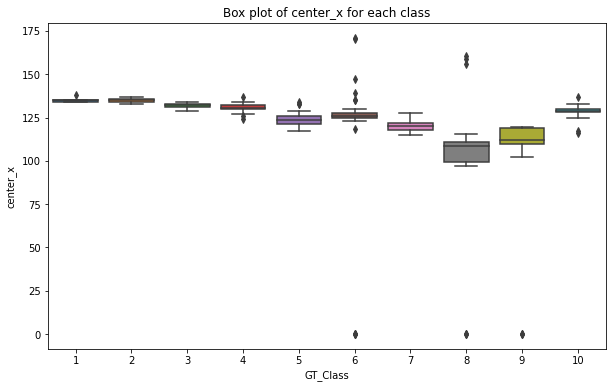

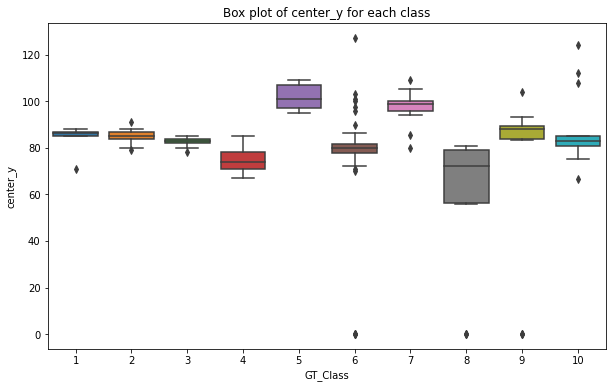

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data into a DataFrame
df = pd.read_csv('E:/Driver_Gaze_Data_Processing/Manual_Annotation/Participants Pupil Detection Data/P2/Eye0_Pupil_Detected1(R-1).csv')

# Create a box plot for 'center_x' based on 'GT_Class'
plt.figure(figsize=(10, 6))
sns.boxplot(x='GT_Class', y='center_x', data=df)
plt.title('Box plot of center_x for each class')
plt.savefig('E:/Driver_Gaze_Data_Processing/Manual_Annotation/Participants Pupil Detection Data/P2/Eye0_center_x.png')
plt.show()
#plt.savefig('C:/Users/Pavan Kumar Sharma/Desktop/Participants/P43/boxplot_center_x.png')
# Create a box plot for 'center_y' based on 'GT_Class'
plt.figure(figsize=(10, 6))
sns.boxplot(x='GT_Class', y='center_y', data=df)
plt.title('Box plot of center_y for each class')
plt.savefig('E:/Driver_Gaze_Data_Processing/Manual_Annotation/Participants Pupil Detection Data/P2/Eye0_center_y.png')
plt.show()


# code toremove and taking average of two values

In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Training and testing data\Logistic_Regression(8_Participants_Testing).csv")

# Define a function to calculate the new values after subtraction
def calculate_new_value(value):
    if value == -1:
        return -1
    else:
        return abs(96 - value)

# Apply the subtraction and create new columns
df['New_center_x0'] = df['center_x0'].apply(calculate_new_value)
df['New_center_y0'] = df['center_y0'].apply(calculate_new_value)
df['New_center_x'] = df['center_x'].apply(calculate_new_value)
df['New_center_y'] = df['center_y'].apply(calculate_new_value)

# Create a new column for the average x
def calculate_average_x(row):
    if row['New_center_x0'] != -1 and row['New_center_x'] != -1:
        return (row['New_center_x0'] + row['New_center_x']) / 2
    elif row['New_center_x0'] != -1:
        return row['New_center_x0']
    elif row['New_center_x'] != -1:
        return row['New_center_x']
    else:
        return -1

df['Avg_center_x'] = df.apply(calculate_average_x, axis=1)

# Create a new column for the average y
def calculate_average_y(row):
    if row['New_center_y0'] != -1 and row['New_center_y'] != -1:
        return (row['New_center_y0'] + row['New_center_y']) / 2
    elif row['New_center_y0'] != -1:
        return row['New_center_y0']
    elif row['New_center_y'] != -1:
        return row['New_center_y']
    else:
        return -1

df['Avg_center_y'] = df.apply(calculate_average_y, axis=1)

# Remove rows where both New_center_x0 and New_center_x are -1
df = df[(df['New_center_x0'] != -1) | (df['New_center_x'] != -1)]

# Remove rows where both New_center_y0 and New_center_Y are -1
df = df[(df['New_center_y0'] != -1) | (df['New_center_y'] != -1)]

# Save the updated DataFrame to a new CSV file
df.to_csv(r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Training and testing data\Logistic_Regression(8_Participants_Testing)_output.csv", index=False)


In [5]:
import pandas as pd

# Load the CSV file into a DataFrame
df=pd.read_csv(r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Left_Right_Eye\Logistic_Regression(8_Participants_Rigt_Eye_Testing_Remove).csv")



# Create a new column for the average x
def calculate_average_x(row):
    if row['Difference'] == 0:
        return 1
    else:
        return 0

df['Difference1'] = df.apply(calculate_average_x, axis=1)



# Save the updated DataFrame to a new CSV file
df.to_csv(r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Left_Right_Eye\Logistic_Regression(8_Participants_Rigt_Eye_Testing_Remove)_output.csv", index=False)


# Remove -1 , 0 and Nan value from the dataset

In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv(r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Left_Right_Eye\Logistic_Regression(8_Participants_Right_Eye_Testing).csv")

# Replace -1, 0 with NaN
df.replace([-1, 0], pd.NA, inplace=True)

# Remove rows with NaN values
df.dropna(inplace=True)

# Save the modified DataFrame to a new CSV file
df.to_csv(r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Left_Right_Eye\Logistic_Regression(8_Participants_Rigt_Eye_Testing_Remove).csv", index=False)


# Random Undersampling the data

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset from the CSV file
file_path = r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Left_Right_Eye\Logistic_Regression(35_Participants_Rigt_Eye_Training_Remove)_output.csv" # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Assuming 'accuracy' is the column representing the class labels (0 or 1)
X = df.drop('Accuracy', axis=1)
y = df['Accuracy']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Display the class distribution before undersampling
print("Class distribution before undersampling:", y_train.value_counts())

# Create a RandomUnderSampler instance
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling to the training set
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Combine the resampled data into a new DataFrame
balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='accuracy')], axis=1)

# Display the class distribution after undersampling
print("Class distribution after undersampling:", balanced_df['accuracy'].value_counts())

# Save the balanced dataset to a new CSV file
balanced_df.to_csv( r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Left_Right_Eye\Logistic_Regression(35_Participants_Rigt_Eye_Training_Remove)_output_balance.csv", index=False)


Class distribution before undersampling: 1    5147
0    1653
Name: Accuracy, dtype: int64
Class distribution after undersampling: 1    1653
0    1653
Name: accuracy, dtype: int64


In [8]:
!pip install -U imbalanced-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Load your dataset from the CSV file
file_path = r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Training and testing data\Logistic_Regression(8_Participants_Testing_Data).csv" 
df = pd.read_csv(file_path)

# Separate features (X) and labels (y)
X = df.drop('Accuracy', axis=1)  # Adjust 'accuracy_column' with the actual column name
y = df['Accuracy']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=42)

# Display the class distribution before undersampling
print("Class distribution before undersampling:", Counter(y_train))

# Create a RandomUnderSampler instance
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling to the training set
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Display the class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))
# Save the balanced dataset to a new CSV file
balanced_df.to_csv( r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Training and testing data\Logistic_Regression(8_Participants_Testing_Data_Balance).csv", index=False)

InvalidParameterError: The 'test_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 0.0 instead.

In [8]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Load your dataset from the CSV file
file_path =  r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Left_Right_Eye\Logistic_Regression(35_Participants_Rigt_Eye_Training_Remove)_output.csv" 
df = pd.read_csv(file_path)

# Separate features (X) and labels (y)
X = df.drop('Accuracy', axis=1)  # Adjust 'accuracy_column' with the actual column name
y = df['Accuracy']

# Display the class distribution before undersampling
print("Class distribution before undersampling:", Counter(y))

# Create a RandomUnderSampler instance
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling to the entire dataset
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Display the class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))

# Save the balanced dataset to a new CSV file
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Accuracy'] = y_resampled
balanced_df.to_csv(r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Left_Right_Eye\Logistic_Regression(35_Participants_Rigt_Eye_Training_Remove)_output_balance.csv" , index=False)


Class distribution before undersampling: Counter({1: 6897, 0: 2170})
Class distribution after undersampling: Counter({0: 2170, 1: 2170})


In [10]:
import pandas as pd
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Load your dataset from the CSV file
file_path = r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Left_Right_Eye\Logistic_Regression(35_Participants_Rigt_Eye_Training_Remove)_output.csv" 
df = pd.read_csv(file_path)

# Separate features (X) and labels (y)
X = df.drop('Accuracy', axis=1)  # Adjust 'accuracy_column' with the actual column name
y = df['Accuracy']

# Display the class distribution before undersampling
print("Class distribution before undersampling:", Counter(y))

# Create a RandomUnderSampler instance
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling to the entire dataset
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Shuffle the data after undersampling
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Accuracy'] = y_resampled
balanced_df = shuffle(balanced_df, random_state=42)

# Display the class distribution after undersampling
print("Class distribution after undersampling:", Counter(balanced_df['Accuracy']))

# Save the balanced and shuffled dataset to a new CSV file
balanced_df.to_csv(r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Left_Right_Eye\Logistic_Regression(35_Participants_Rigt_Eye_Training_Remove)_output_balance.csv", index=False)


Class distribution before undersampling: Counter({1: 6897, 0: 2170})
Class distribution after undersampling: Counter({1: 2170, 0: 2170})


# SMOTE(Synthetic Minority Over-sampling)

In [7]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load your dataset from the CSV file
file_path = r"D:\Academics\


g\Manual_Annotation\Logistic Regression Data\Training and testing data\Logistic_Regression(27_Participants_Training_Data).csv" 
df = pd.read_csv(file_path)

# Separate features (X) and labels (y)
X = df.drop('Accuracy', axis=1)  # Adjust 'accuracy_column' with the actual column name
y = df['Accuracy']

# Display the class distribution before oversampling
print("Class distribution before oversampling:", Counter(y))

# Create a SMOTE instance
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

# Save the balanced dataset to a new CSV file
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Accuracy'] = y_resampled
balanced_df.to_csv(r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Training and testing data\Logistic_Regression(27_Participants_SMOTE_Data).csv", index=False)


Class distribution before oversampling: Counter({1: 6074, 0: 1695})
Class distribution after oversampling: Counter({1: 6074, 0: 6074})


In [8]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from collections import Counter

# Load your dataset from the CSV file
file_path = r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Training and testing data\Logistic_Regression(27_Participants_Training_Data).csv" 
df = pd.read_csv(file_path)

# Separate features (X) and labels (y)
X = df.drop('Accuracy', axis=1)  # Adjust 'accuracy_column' with the actual column name
y = df['Accuracy']

# Display the class distribution before oversampling
print("Class distribution before oversampling:", Counter(y))

# Create a SMOTE instance
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine X_resampled and y_resampled into a DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Accuracy'] = y_resampled

# Shuffle the data after oversampling
balanced_df = shuffle(balanced_df, random_state=42)

# Display the class distribution after oversampling and shuffling
print("Class distribution after oversampling:", Counter(balanced_df['Accuracy']))

# Save the balanced and shuffled dataset to a new CSV file
balanced_df.to_csv(r"D:\Academics\PHD Admission\IIT Kanpur\Data Collection\Driver_Gaze_Data_Processing\Manual_Annotation\Logistic Regression Data\Training and testing data\Logistic_Regression(27_Participants_SMOTE_Data_Shuffled).csv", index=False)


Class distribution before oversampling: Counter({1: 6074, 0: 1695})
Class distribution after oversampling: Counter({0: 6074, 1: 6074})


# Blink Dtection